In [65]:
import numpy as np
from qiskit import *
from qiskit.quantum_info import Statevector
from IPython.display import display, Math, Latex
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import matplotlib.pyplot as plt

<IPython.core.display.Latex object>

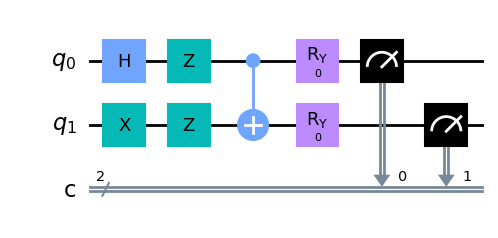

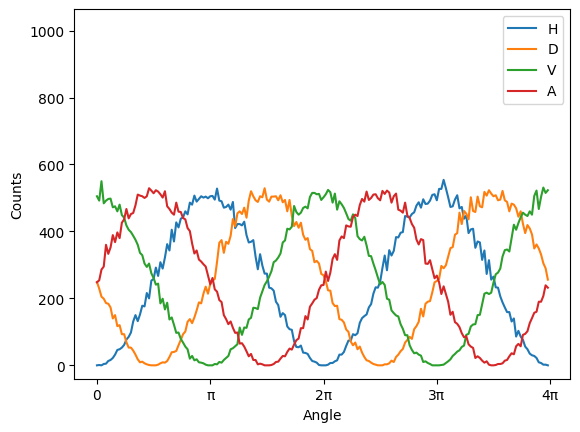

In [66]:
# N = how many rotation steps
N = 200

# numShots = how many times to run each circuit
numShots = 1024

x_val = []
y_val = [[], [], [], []]
states = ['H', 'D', 'V', 'A']

qc = QuantumCircuit(2, 2)

for i in range(4):
    
    for j in range(N):
        # build the circuit
        qc.clear()
        qc = QuantumCircuit(2, 2)

        # entangling gates go here
        qc.h(0)
        qc.x(1)
        qc.z(0)
        qc.z(1)
        qc.cx(0, 1)

        # keep A the same, and rotate B
        qc.ry(i*pi/2, 0)
        delta = 4*j*pi/N
        qc.ry(delta, 1)

        # display the state after the gates for the first time
        if i + j == 0:
            display(Statevector(qc).draw(output='latex'))

        qc.measure([0, 1], [0, 1])

        # display the circuit for the first time
        if i + j == 0:
            display(qc.draw(output='mpl'))

        # simulate
        backend = Aer.get_backend('qasm_simulator')
        job = backend.run(transpile(qc, backend), shots=numShots)
        result = job.result()
        counts = result.get_counts(qc)

        # put in a zero for the count if needed
        if '00' in counts:
            out0 = counts['00']
        else:
            out0 = 0 
            
        if i == 0:
            x_val.append(delta)
            
        y_val[i].append(out0)

fig, ax = plt.subplots()

for i in range(4):
    ax.plot(x_val, y_val[i], label=states[i])
    
ax.set_xlabel("Angle")
ax.set_ylabel("Counts")
ax.set_ylim(0 - 40, numShots + 40)
x_ticks = ax.set_xticks([0, pi, 2*pi, 3*pi, 4*pi], ['0', 'π', '2π', '3π', '4π'])
legend = plt.legend()